In [40]:
import matplotlib.pyplot as plt
import numba
import numpy as np
from time import time
import pandas as pd
import seaborn as sns
from random import randint
import random
from typing import Iterable
import math
sns.set_style("darkgrid")



def benchmark(func, list_of_args: list[tuple | int], x_values: Iterable[int], log_scalex=False):
    compiled_func = numba.njit(fastmath=True)(func)
    arg0 = list_of_args[0]
    if not isinstance(arg0, tuple):
        arg0 = (arg0,)
    compiled_func(*arg0)
    
    benchmark_data = pd.DataFrame(columns=["x", "time", "func_type"])
    for args, x in zip(list_of_args, x_values):
        if not isinstance(args, tuple):
            args = (args,)
        s = time()
        func(*args)
        t_native = time() - s

        s = time()
        compiled_func(*args)
        t_compiled = time() - s

        benchmark_data.loc[len(benchmark_data)] = [x, t_native, "native"]
        benchmark_data.loc[len(benchmark_data)] = [x, t_compiled, "numba"]

    last_time_native = benchmark_data[benchmark_data.func_type == "native"].iloc[-1].time
    last_time_numba = benchmark_data[benchmark_data.func_type == "numba"].iloc[-1].time
    ratio = last_time_native / last_time_numba
    print(f"Разница в конце: в {ratio} раз")
    g = sns.relplot(
        data=benchmark_data,
        x="x",
        y="time",
        hue="func_type",
        kind="line"
    )
    if log_scalex:
        g.set(xscale="log")
    plt.show()

Разница в конце: в 161.58842321079484 раз


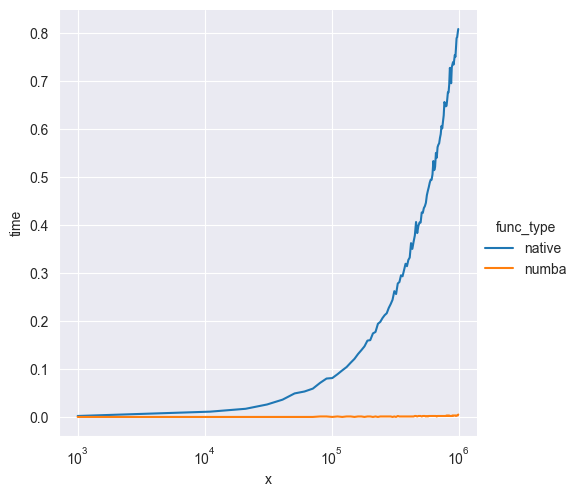

In [36]:
def random_sum(N: int):
    s = 0
    for _ in range(N):
        s += randint(-1000, 1000)

Ns = list(range(1000, 10**6, 10000))
benchmark(random_sum, Ns, Ns, log_scalex=True)

C:\Users\Gleb\AppData\Local\Temp\ipykernel_9476\933825802.py:38: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = last_time_native / last_time_numba


Разница в конце: в inf раз


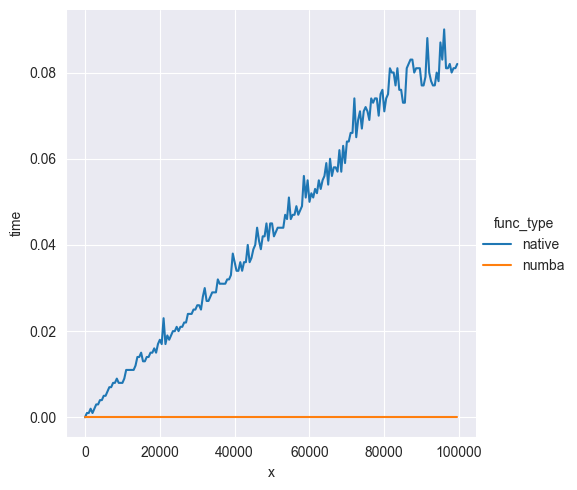

In [34]:
def heavy_math(N: int):
    s = 0
    for x in range(1, N):
        s += math.cos(x) * math.sin(x + 1) ** (-math.pi) * math.log(x)

Ns = list(range(0, 100000, 500))
benchmark(heavy_math, Ns, Ns)

Разница в конце: в 222.9034795042898 раз


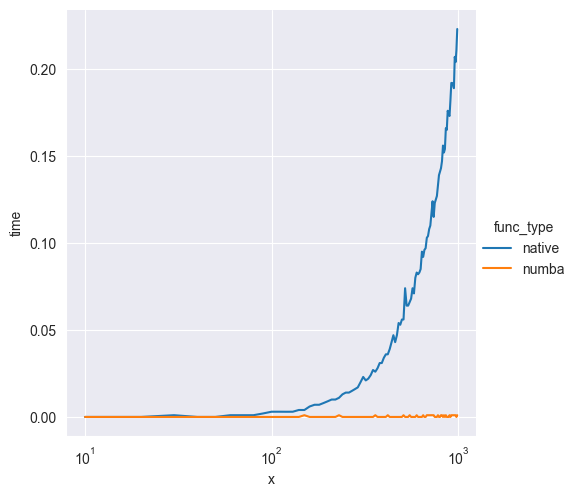

In [35]:
def bubble_sort(arr: np.ndarray):
    n = len(arr)
    arr = arr.copy()
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

arrays = []
Ns = list(range(10, 1000, 10))
for N in Ns:
    arrays.append(np.random.random(N))
benchmark(bubble_sort, arrays, Ns, log_scalex=True)

C:\Users\Gleb\PycharmProjects\python-tumba\venv\lib\site-packages\numba\core\ir_utils.py:2172: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'arr' of function 'bubble_sort'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "..\..\AppData\Local\Temp\ipykernel_9476\3357958502.py", line 1:
<source missing, REPL/exec in use?>

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


Разница в конце: в 43.31461095395522 раз


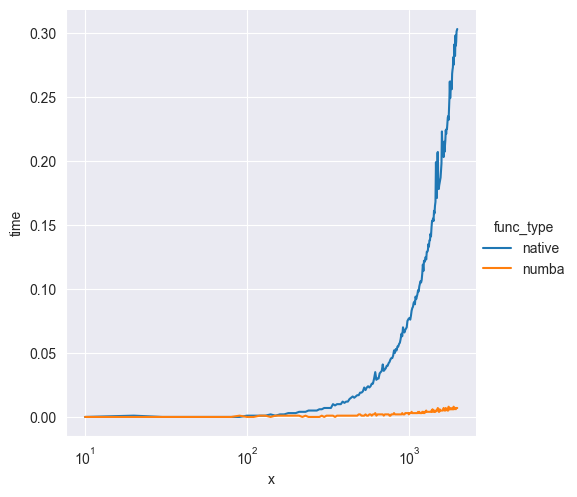

In [39]:
def bubble_sort(arr: list):
    n = len(arr)
    arr = arr.copy()
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

arrays = []
Ns = list(range(10, 2000, 10))
for N in Ns:
    arrays.append(list(np.random.random(N)))
benchmark(bubble_sort, arrays, Ns, log_scalex=True)

Разница в конце: в 50.9849821215733 раз


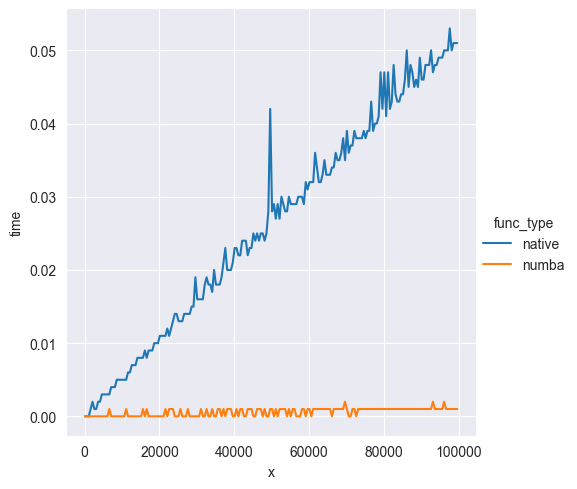

In [42]:
def monte_carlo_pi(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples


Ns = list(range(100, 100000, 500))
benchmark(monte_carlo_pi, Ns, Ns)